In [1]:
from google.colab import files

uploaded = files.upload()
upload2 = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

data_x= pd.read_csv('joints_tobar.txt',delimiter=" ",header=None)
data_y= pd.read_csv('ground_truth.txt',delimiter=" ",header=None)
feat=data_x.as_matrix()
gtruth=data_y.as_matrix()

print('{0:2d} datos de entrada con tamaño {1:2d}'.format(len(feat),len(feat[0])))
print('{0:2d} datos de salida con tamaño {1:2d}'.format(len(gtruth),len(gtruth[0])))


y=[]
x=[]
time=[]
#print(ground_t)
#Extraer x,y,z
for i in range(0,len(feat)):
    xi=[]
    for j in range(1,len(feat[0])):
        xi.append(feat[i][j])
    x.append(xi)
    time.append(feat[i][0])
    #if i%10000==0:
        #print(xi)
        
for i in range(0,len(gtruth)):
    pos=[]
    pos.append(gtruth[i][1])
    pos.append(gtruth[i][1])
    pos.append(gtruth[i][1])
    y.append(pos)
    #if i%10000==0:
        #print(pos)
        
print('{0:2d} datos de entrada con tamaño {1:2d}'.format(len(x),len(x[0])))
print('{0:2d} datos de salida con tamaño {1:2d}'.format(len(y),len(y)))
x_train= x[:30000]
y_train= y[:30000]
x_val = x[30000:]
y_val = y[30000:]
print('tamaño conjunto de entrenamiento: {0:2d}'.format(len(x_train)))
print('tamaño conjunto de validacion: {0:2d}'.format(len(y_val)))

46874 datos de entrada con tamaño 21
46874 datos de salida con tamaño  8
46874 datos de entrada con tamaño 20
46874 datos de salida con tamaño 46874
tamaño conjunto de entrenamiento: 30000
tamaño conjunto de validacion: 16874


Epoch: 0001 cost=1234.565520136
Epoch: 0002 cost=430.949382363
Epoch: 0003 cost=261.412298013
Epoch: 0004 cost=300.613125534
Epoch: 0005 cost=328.127218721
Epoch: 0006 cost=345.363833944
Epoch: 0007 cost=335.741902740
Epoch: 0008 cost=318.851467500
Epoch: 0009 cost=311.180245901
Epoch: 0010 cost=314.839110705
Epoch: 0011 cost=329.863276142
Epoch: 0012 cost=360.046897979
Epoch: 0013 cost=399.840742825
Epoch: 0014 cost=430.015340804
Epoch: 0015 cost=448.817905826
Optimization Finished!
16874


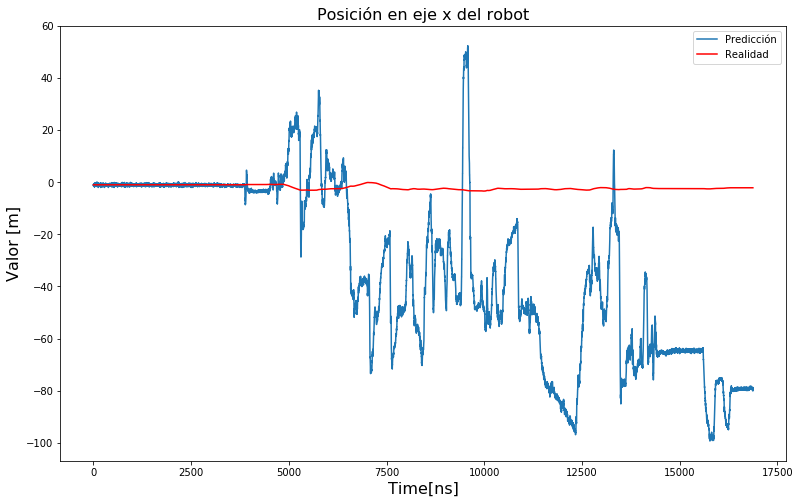

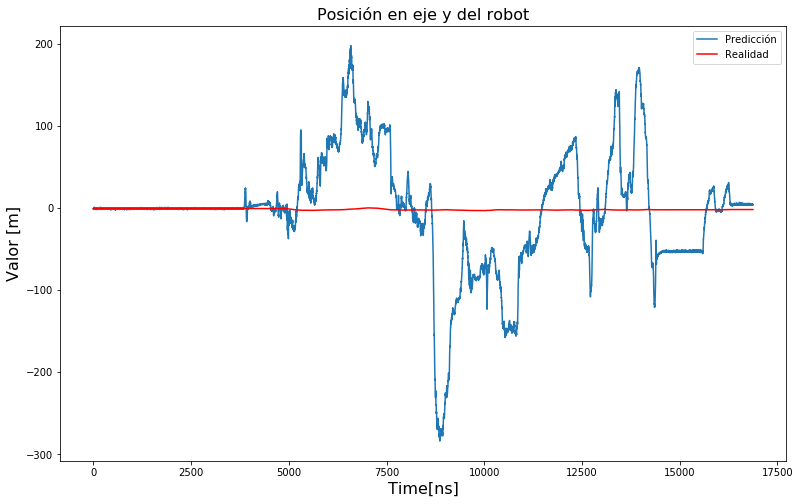

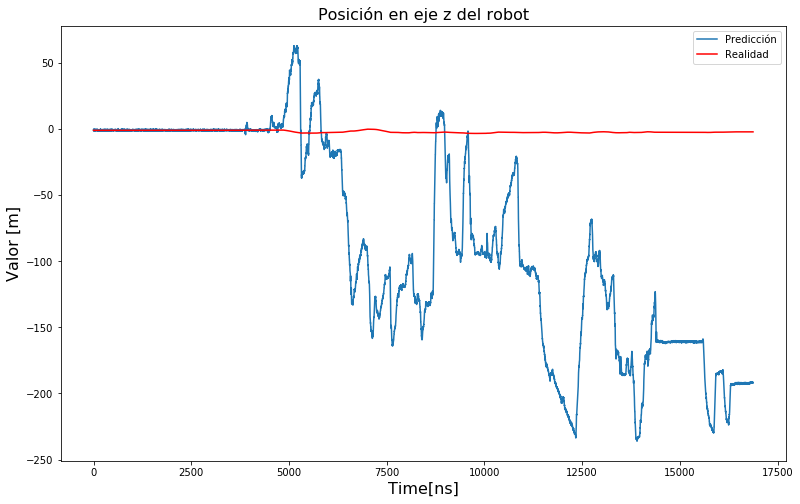

In [21]:
""" Multilayer Perceptron.
A Multilayer Perceptron (Neural Network) implementation example using
TensorFlow library. This example is using the MNIST database of handwritten
digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""

# ------------------------------------------------------------------
#
# THIS EXAMPLE HAS BEEN RENAMED 'neural_network.py', FOR SIMPLICITY.
#
# ------------------------------------------------------------------


from __future__ import print_function

# Import MNIST data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

#import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 20 # MNIST data input (img shape: 28*28)
n_classes = 3 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
loss_op = tf.losses.mean_squared_error(labels=Y,predictions=logits)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(x_train)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = x_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    #pred = tf.nn.softmax(logits)  # Apply softmax to logits
    
    ###################
    Z = logits.eval(feed_dict={X: x_val})
    MSE = tf.losses.mean_squared_error(labels=Y,predictions=Z)
    MSE2=tf.reduce_mean(MSE)
    #print(Y)
    #print(Z)
    #print(y_val)
    print(len(Z))
    #print(MSE)
    #print(MSE2)
    #############
    x_pred=[]
    x_true=[]
    y_pred=[]
    y_true=[]
    z_pred=[]
    z_true=[]
    t=list(range(0, 16873))
    for k in range(0,len(y_val)-1):
        x_pred.append(Z[k][0])
        x_true.append(y_val[k][0])
        y_pred.append(Z[k][1])
        y_true.append(y_val[k][1])
        z_pred.append(Z[k][2])
        z_true.append(y_val[k][2])
    
    
    
    plt.figure(figsize=(13,8))
    plt.plot(t, x_pred, '-')
    plt.plot(t, x_true, 'r-')
    #plt.plot(xpred,ypred,'g-')
    #plt.axis([0, 102, 0, 52])
    plt.title('Posición en eje x del robot', fontsize=16)
    plt.xlabel('Time[ns]', fontsize=16)
    plt.ylabel('Valor [m]', fontsize=16)
    plt.legend(["Predicción","Realidad"])
    plt.show()
    
    plt.figure(figsize=(13,8))
    plt.plot(t, y_pred, '-')
    plt.plot(t, y_true, 'r-')
    #plt.plot(xpred,ypred,'g-')
    #plt.axis([0, 102, 0, 52])
    plt.title('Posición en eje y del robot', fontsize=16)
    plt.xlabel('Time[ns]', fontsize=16)
    plt.ylabel('Valor [m]', fontsize=16)
    plt.legend(["Predicción","Realidad"])
    plt.show()
    
    plt.figure(figsize=(13,8))
    plt.plot(t, z_pred, '-')
    plt.plot(t, z_true, 'r-')
    #plt.plot(xpred,ypred,'g-')
    #plt.axis([0, 102, 0, 52])
    plt.title('Posición en eje z del robot', fontsize=16)
    plt.xlabel('Time[ns]', fontsize=16)
    plt.ylabel('Valor [m]', fontsize=16)
    plt.legend(["Predicción","Realidad"])
    plt.show()
    
    #correct_prediction = tf.reduce_mean(logits, Y)
    # Calculate accuracy
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    #acc = accuracy.eval(feed_dict={X:x_val,Y:y_val})